# Assignment 4 Dataset:

Use fashion-mnist dataset for this assignment. You will have a chance to explore various Deep Learning models in this Assignment.

# Dataset description:

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

# Labels:
Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




# Assignment 4 - Questions

This Assignment focuses on exploring various Deep Learning models(neural networks) and model building. 

1. Load the fashion-mnist dataset from the tensorflow datasets or download from kaggle(https://www.kaggle.com/zalando-research/fashionmnist)
2. Normalize the data - briefly comment why we need to normalize?
3. Split the dataset into train(50,000), valid(10,000) and test sets(10,000)
4. Reshape the input data to a 2D for MLP(Multi Layer perceptron) and tensor(4d) for CNN(Convolution Neural Network)
5. Build a Neural Network Multi-Layer Perceptron Classifier model (you can use sklearn neural network MLP Classifier)
6. Experiment with the architecture of the MLP classfier that you already built and report if you seen any improvement in the accuracy
7. Build a basic sequential deep learning model(CNN) and compare the accuracy with MLP Classifier
8. Experiment with the architecture of CNN and report if you see any improvement in the accuracy
9. Evaluate MLPClassifier and CNN using F1 score values and accuracy(only for the best model)
10. Explain the paramters to tune to reduce the risk of overfitting in deep learning models
10. Optional Explain the meaning of Precision, Recall and F1-Score and why these are used to evaluate Classification models (instead of using Accuracy as a metric). 

10. optional: Try any advanced deep learning model

Submit the .ipynb, and .html 


In [ ]:
pip install -U sklearn

In [41]:
# Common imports
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

1.	Load the fashion-mnist dataset 

In [42]:
df = pd.read_csv("fashion-mnist_train.csv")
df_t = pd.read_csv("fashion-mnist_test.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [43]:
y=df[['label']]
X=df.drop(['label'], axis=1) 

In [44]:
y_test=df_t[['label']]
X_test=df_t.drop(['label'], axis=1) 

2.	Normalize the data - briefly comment why we need to normalize?

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. It is required only when features have different ranges.

In [45]:
X=preprocessing.normalize(X, norm='l2')
X_test=preprocessing.normalize(X_test, norm='l2')

3.	Split the dataset

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=1/6, random_state=15)

In [47]:
y_valid.shape

(10000, 1)

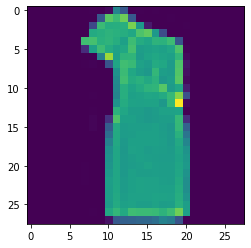

In [48]:
some_pic = X_train[0]
some_pic_image = some_pic.reshape(28,28)
plt.imshow(some_pic_image)
plt.show()

4.	Reshape the input data 

In [49]:
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)
X_valid = X_valid.reshape(X_valid.shape[0],28,28)

5.	Build a Neural Network Multi-Layer Perceptron Classifier model 

In [51]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [52]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu' ,input_shape=(28*28,)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))

In [53]:
optim = keras.optimizers.SGD(lr=0.01, momentum=0.950,  nesterov=True)

In [54]:
model.compile(loss='categorical_crossentropy',
 optimizer=optim,
 metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train,
batch_size=80,
epochs=12,
verbose=2,
validation_data=(X_valid, y_valid))

Epoch 1/12
625/625 - 3s - loss: 1.4766 - accuracy: 0.4301 - val_loss: 0.7822 - val_accuracy: 0.6922
Epoch 2/12
625/625 - 3s - loss: 0.7190 - accuracy: 0.7222 - val_loss: 0.5371 - val_accuracy: 0.7920
Epoch 3/12
625/625 - 3s - loss: 0.5696 - accuracy: 0.7944 - val_loss: 0.4746 - val_accuracy: 0.8238
Epoch 4/12
625/625 - 3s - loss: 0.5154 - accuracy: 0.8170 - val_loss: 0.4366 - val_accuracy: 0.8406
Epoch 5/12
625/625 - 3s - loss: 0.4854 - accuracy: 0.8273 - val_loss: 0.4200 - val_accuracy: 0.8428
Epoch 6/12
625/625 - 3s - loss: 0.4657 - accuracy: 0.8350 - val_loss: 0.4103 - val_accuracy: 0.8470
Epoch 7/12
625/625 - 3s - loss: 0.4487 - accuracy: 0.8400 - val_loss: 0.3969 - val_accuracy: 0.8560
Epoch 8/12
625/625 - 3s - loss: 0.4348 - accuracy: 0.8453 - val_loss: 0.3921 - val_accuracy: 0.8573
Epoch 9/12
625/625 - 3s - loss: 0.4221 - accuracy: 0.8485 - val_loss: 0.3803 - val_accuracy: 0.8595
Epoch 10/12
625/625 - 3s - loss: 0.4163 - accuracy: 0.8504 - val_loss: 0.3743 - val_accuracy: 0.8630

In [56]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Highest Accuracy', score[1])

Test loss: 0.3478630483150482
Highest Accuracy 0.8722000122070312


Accuracy for the MLP model 1 is 87.22%.

6.	Experiment with the architecture of the MLP classfier

In [57]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(180, activation='relu' ,input_shape=(28*28,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(360, activation='relu',))
model_2.add(Dropout(0.4))
model_2.add(Dense(512, activation='relu',))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='sigmoid',))

In [58]:
model_2.compile(loss='categorical_crossentropy',
 optimizer=optim,
 metrics=['accuracy'])

In [59]:
history = model_2.fit(X_train, y_train,
batch_size=100,
epochs=18,
verbose=2,
validation_data=(X_valid, y_valid))

Epoch 1/18
500/500 - 5s - loss: 1.7013 - accuracy: 0.3505 - val_loss: 0.8807 - val_accuracy: 0.6329
Epoch 2/18
500/500 - 5s - loss: 0.7946 - accuracy: 0.6837 - val_loss: 0.5835 - val_accuracy: 0.7712
Epoch 3/18
500/500 - 5s - loss: 0.6046 - accuracy: 0.7733 - val_loss: 0.4998 - val_accuracy: 0.8123
Epoch 4/18
500/500 - 5s - loss: 0.5352 - accuracy: 0.8047 - val_loss: 0.4642 - val_accuracy: 0.8286
Epoch 5/18
500/500 - 5s - loss: 0.4966 - accuracy: 0.8199 - val_loss: 0.4359 - val_accuracy: 0.8381
Epoch 6/18
500/500 - 5s - loss: 0.4776 - accuracy: 0.8289 - val_loss: 0.4139 - val_accuracy: 0.8501
Epoch 7/18
500/500 - 5s - loss: 0.4605 - accuracy: 0.8345 - val_loss: 0.4132 - val_accuracy: 0.8486
Epoch 8/18
500/500 - 5s - loss: 0.4463 - accuracy: 0.8389 - val_loss: 0.3955 - val_accuracy: 0.8527
Epoch 9/18
500/500 - 5s - loss: 0.4370 - accuracy: 0.8397 - val_loss: 0.3957 - val_accuracy: 0.8555
Epoch 10/18
500/500 - 5s - loss: 0.4256 - accuracy: 0.8454 - val_loss: 0.3861 - val_accuracy: 0.8582

In [61]:
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Highest Accuracy', score[1])

Test loss: 0.36175110936164856
Highest Accuracy 0.8658999800682068


Accuracy for MLP model2 is 86.58% which is lesser than first model.

7.	Build a basic sequential deep learning model(CNN) 

In [62]:
X_train_2 = X_train.reshape(X_train.shape[0],28,28,1)
X_test_2 = X_test.reshape(X_test.shape[0],28,28,1)
X_valid_2 = X_valid.reshape(X_valid.shape[0],28,28,1)

In [63]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=80, kernel_size=2, activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=50, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [64]:
model.compile(loss='categorical_crossentropy',
             optimizer='adamax',
             metrics=['accuracy'])

In [65]:
model.fit(X_train_2,
         y_train,
         batch_size=64,
         epochs=12,
         validation_data=(X_valid_2, y_valid))

Epoch 1/12
782/782 [==============================] - 74s 95ms/step - loss: 0.8502 - accuracy: 0.6833 - val_loss: 0.5733 - val_accuracy: 0.7820
Epoch 2/12
782/782 [==============================] - 75s 96ms/step - loss: 0.5787 - accuracy: 0.7837 - val_loss: 0.4879 - val_accuracy: 0.8219
Epoch 3/12
782/782 [==============================] - 75s 96ms/step - loss: 0.5168 - accuracy: 0.8085 - val_loss: 0.4497 - val_accuracy: 0.8336
Epoch 4/12
782/782 [==============================] - 78s 100ms/step - loss: 0.4796 - accuracy: 0.8224 - val_loss: 0.4164 - val_accuracy: 0.8462
Epoch 5/12
782/782 [==============================] - 75s 96ms/step - loss: 0.4505 - accuracy: 0.8371 - val_loss: 0.4021 - val_accuracy: 0.8516
Epoch 6/12
782/782 [==============================] - 75s 96ms/step - loss: 0.4302 - accuracy: 0.8430 - val_loss: 0.3816 - val_accuracy: 0.8620
Epoch 7/12
782/782 [==============================] - 75s 95ms/step - loss: 0.4140 - accuracy: 0.8486 - val_loss: 0.3695 - val_accuracy

In [66]:
score = model.evaluate(X_test_2, y_test, verbose=0)
print('Test loss:', score[0])
print('Highest Accuracy', score[1])

Test loss: 0.3193071186542511
Highest Accuracy 0.8838000297546387


In [68]:
from sklearn import metrics
cnn_pred_mnist = model.predict(X_test_2)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(y_test,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
print("F1 score: {}".format(cnn_f1_mnist))

F1 score: 0.8826422538760266


F1 score for CNN model is .88 and accuracy is 88.38% which is better than previous two MLP models

8.	Experiment with the architecture of CNN

In [69]:
model_c1 = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model_c1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, activation='relu', input_shape=(28,28,1))) 
model_c1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_c1.add(tf.keras.layers.Dropout(0.3))
model_c1.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2, activation='relu'))
model_c1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_c1.add(tf.keras.layers.Dropout(0.3))
model_c1.add(tf.keras.layers.Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
model_c1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_c1.add(tf.keras.layers.Dropout(0.3))
model_c1.add(tf.keras.layers.Flatten())
model_c1.add(tf.keras.layers.Dense(512, activation='relu'))
model_c1.add(tf.keras.layers.Dropout(0.5))
model_c1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [70]:
model_c1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [71]:
model_c1.fit(X_train_2,
         y_train,
         batch_size=64,
         epochs=15,
         validation_data=(X_valid_2, y_valid))

Epoch 1/15
782/782 [==============================] - 432s 552ms/step - loss: 0.7165 - accuracy: 0.7283 - val_loss: 0.4693 - val_accuracy: 0.8198
Epoch 2/15
782/782 [==============================] - 429s 549ms/step - loss: 0.4522 - accuracy: 0.8338 - val_loss: 0.3676 - val_accuracy: 0.8656
Epoch 3/15
782/782 [==============================] - 434s 554ms/step - loss: 0.3924 - accuracy: 0.8557 - val_loss: 0.3352 - val_accuracy: 0.8741
Epoch 4/15
782/782 [==============================] - 429s 549ms/step - loss: 0.3664 - accuracy: 0.8663 - val_loss: 0.3312 - val_accuracy: 0.8761
Epoch 5/15
782/782 [==============================] - 427s 546ms/step - loss: 0.3404 - accuracy: 0.8734 - val_loss: 0.2963 - val_accuracy: 0.8928
Epoch 6/15
782/782 [==============================] - 427s 546ms/step - loss: 0.3272 - accuracy: 0.8798 - val_loss: 0.2882 - val_accuracy: 0.8926
Epoch 7/15
782/782 [==============================] - 429s 549ms/step - loss: 0.3117 - accuracy: 0.8854 - val_loss: 0.2794 -

9.	Evaluate MLPClassifier and CNN 

In [73]:
score = model_c1.evaluate(X_test_2, y_test, verbose=0)
print('Test loss:', score[0])
print('Highest accuracy:', score[1])

Test loss: 0.22002370655536652
Highest accuracy: 0.920199990272522


In [75]:
from sklearn import metrics
cnn_pred_mnist = model_c1.predict(X_test_2)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(y_test,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
print("F1 score: {}".format(cnn_f1_mnist))

F1 score: 0.919713907792208


In [77]:
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Highest accuracy:', score[1])

Test loss: 0.36175110936164856
Highest accuracy: 0.8658999800682068


In [78]:
from sklearn import metrics
mlp_pred_mnist = model_2.predict(X_test)
mlp_pred_mnist = np.argmax(mlp_pred_mnist,axis=1)
y_true = np.argmax(y_test,axis=1)

mlp_f1_mnist = metrics.f1_score(y_true, mlp_pred_mnist, average= "weighted")
print("F1 score: {}".format(mlp_f1_mnist))

F1 score: 0.8680376139336667


Accuracy of CNN is highest with hyperparameter tuning which is 92.01%. Overall accuracy of CNN model is higher compared to MLP.

10.	Explain the paramters to tune to reduce the risk of overfitting 

We can use Dropout layers, which will randomly remove certain features by setting them to zero. We can use early stopping to avoid overfitting. We can use more data to train the model.Cross validation can help reduce overfitting